In [1]:
# modified from http://sheaves.github.io/other/guesswho.html
import numpy as np
import pandas as pd
from functools import reduce

# Initial data
names = ['Alice', 'Bob', 'Charles', 'Diane', 'Emma', 'Fred','Gladys','Hugo']
features = ['Female', 'Glasses', 'Short Hair', 'Brown Eyes', 'Headgear', 'Earrings', 'Beard']
data_array = np.array([[1, 0, 0, 1, 1, 1, 0],
                       [0, 1, 1, 1, 0, 0, 1],
                       [0, 0, 1, 0, 0, 0, 0],
                       [1, 1, 0, 1, 0, 0, 0],
                       [1, 0, 1, 1, 1, 1, 0],
                       [0, 0, 0, 0, 0, 1, 1],
                       [1, 0, 0, 0, 0, 0, 0],
                       [0, 0, 1, 0, 0, 0, 0]
                      ])

# Create DataFrame from above data, placing names in the first column.
df = pd.DataFrame(data_array, columns = features)
df.insert(0, 'Name', names)
df

,Name,Female,Glasses,Short Hair,Brown Eyes,Headgear,Earrings,Beard
0,Alice,1,0,0,1,1,1,0
1,Bob,0,1,1,1,0,0,1
2,Charles,0,0,1,0,0,0,0
3,Diane,1,1,0,1,0,0,0
4,Emma,1,0,1,1,1,1,0
5,Fred,0,0,0,0,0,1,1
6,Gladys,1,0,0,0,0,0,0
7,Hugo,0,0,1,0,0,0,0


In [2]:
def filter_by_features(df, known_features):
    if len(known_features) == 0:
        return df
    else:
        return df[reduce(lambda x,y: x&y, [df[feature] == val  for feature,val in known_features.items()])] 
    
def prob(df, known_features, name = None):
    filtered_df = filter_by_features(df, known_features)
    
    if name is None:
        return len(filtered_df)/len(df)
    else:
        return len(filtered_df[filtered_df['Name'] == name])/len(df)    

In [3]:
def conditional_mutual_info(df, feature, known_features):
    filtered_df = filter_by_features(df, known_features)
    
    cmi_sum = 0
    for val in [0,1]:
        for name in set(df['Name']):
            p_valname = prob(filtered_df, {feature: val}, name)
            if p_valname > 0:
                p_val     = prob(filtered_df, {feature: val})
                p_name    = prob(filtered_df, {}, name)
                
                cmi_sum += p_valname * np.log2( p_valname/(p_val * p_name) )
        
    return cmi_sum

In [4]:
Features=pd.DataFrame(features,columns=['Features'])
MI = np.zeros((len(features),len(features)))
CMI=MI
II=MI
for feat in set(Features['Features']):
    ind=features.index(feat)
    known_features = {feat:1}
    remaining_features = [feature for feature in features if feature not in known_features.keys()]    
    cmi = [conditional_mutual_info(df, feature, known_features) for feature in remaining_features]
    mi =  [conditional_mutual_info(df, feature, {}) for feature in features]
    MI[:,ind]=np.array(mi);
    cmi.insert(ind,0)
    CMI[:,ind]=np.array(cmi);
    II[:,ind]=np.array(cmi)-np.array(mi)

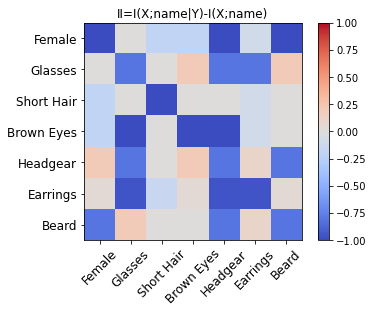

In [5]:
import matplotlib.pyplot as plt
from matplotlib import colors
divnorm=colors.TwoSlopeNorm(vmin=-1, vcenter=0., vmax=1)
plt.imshow(II, cmap='coolwarm',norm=divnorm)
plt.colorbar()
plt.xticks(range(len(features)), features, fontsize=12,rotation=45)
plt.yticks(range(len(features)), features, fontsize=12)
plt.title('II=I(X;name|Y)-I(X;name)')
plt.show()